In [78]:
import os
import torch
import numpy as np
import yaml
import math
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
import pandas as pd
import sklearn
import cv2
from utils import get_test_video

from cnn_only_model import CNNModel
from grayscale_model import GrayscaleModel
from vgg16_model import VGGModel
from logger import Logger
from optical_fusion_model import OpticalFusionModel

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f'Device: {device}')
labels = ['2p0', '2p1', '3p0', '3p1', 'ft0', 'ft1', 'mp0', 'mp1']

Device: cuda


# Getting a video from the testing dataset

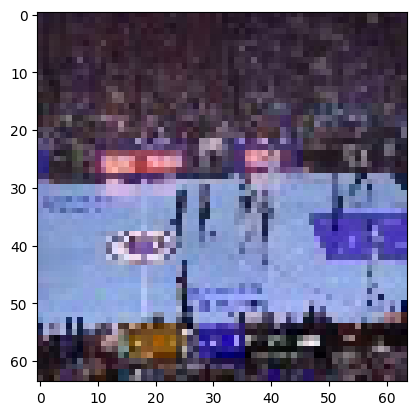

In [79]:
video_directory = 'dataset\\test\\2p0\\2p0_v108_000437_x264_t_2_padded.avi'

test_video = get_test_video(video_directory)
plt.imshow(test_video[0])

# Baseline Model

In [80]:
from baseline_model import BaselineModel

with open(f'./trained_models/baseline.pkl', 'rb') as file:
    baseline_model = pickle.load(file)

baseline_model.eval()
input_tensor = torch.tensor(np.array([np.transpose(test_video, [3, 0, 1, 2])]), dtype = torch.float32, device=device)
print(input_tensor.shape)

output = baseline_model(input_tensor)
print(output.shape)

y_pred = torch.softmax(output, dim = 1)
y_pred = torch.argmax(y_pred, dim = 1)

print(output)
print('Prediction:', labels[y_pred.tolist()[0]])

torch.Size([1, 3, 90, 64, 64])
torch.Size([1, 8])
tensor([[ 0.0053, -0.0116,  0.0914, -0.0037, -0.0143,  0.0735,  0.1186,  0.0251]],
       device='cuda:0', requires_grad=True)
Prediction: mp0


# CNN Only Model

In [81]:
from cnn_only_model import CNNModel

with open(f'./trained_models/cnn_only.pkl', 'rb') as file:
    cnn_only_model = pickle.load(file)

cnn_only_model.eval()
input_tensor = torch.tensor(np.array([np.transpose(test_video, [3, 0, 1, 2])]), dtype = torch.float32, device=device)
print(input_tensor.shape)

output = cnn_only_model(input_tensor)
print(output.shape)

y_pred = torch.softmax(output, dim = 1)
y_pred = torch.argmax(y_pred, dim = 1)

print(output)
print('Prediction:', labels[y_pred.tolist()[0]])

torch.Size([1, 3, 90, 64, 64])
torch.Size([1, 8])
tensor([[ 0.0096,  0.0555, -0.0071,  0.0267, -0.0625,  0.0416,  0.0502,  0.0356]],
       device='cuda:0', requires_grad=True)
Prediction: 2p1


# Gray scale model

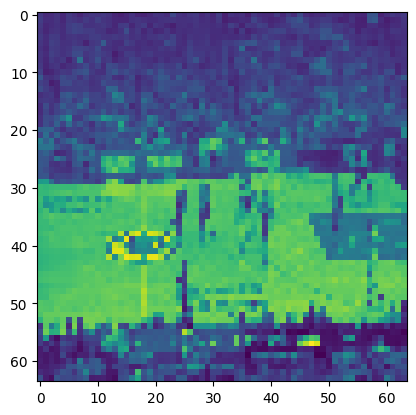

In [82]:
test_video = get_test_video(video_directory, gray_scale=True)
plt.imshow(test_video[0])

In [83]:
from grayscale_model import GrayscaleModel

with open(f'./trained_models/grayscale.pkl', 'rb') as file:
    grayscale_model = pickle.load(file)

grayscale_model.eval()
input_tensor = torch.tensor(np.array([test_video]), dtype = torch.float32, device=device)
print(input_tensor.shape)

output = grayscale_model(input_tensor)
print(output.shape)

y_pred = torch.softmax(output, dim = 1)
y_pred = torch.argmax(y_pred, dim = 1)

print(output)
print('Prediction:', labels[y_pred.tolist()[0]])

torch.Size([1, 90, 64, 64])
torch.Size([1, 8])
tensor([[-0.0017, -0.0316,  0.0024, -0.0210, -0.0812,  0.0099, -0.0188, -0.0580]],
       device='cuda:0', requires_grad=True)
Prediction: ft1


# Two Stream Optical Model

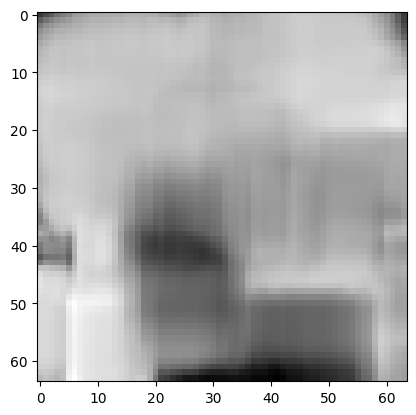

In [84]:
test_video, optical_flow = get_test_video(video_directory, dense_optical_flow=True)
plt.imshow(optical_flow[0])

In [85]:
from optical_fusion_model import OpticalFusionModel

with open(f'./trained_models/two_stream_optical.pkl', 'rb') as file:
    optical_fusion_model = pickle.load(file)

optical_fusion_model.eval()
input_video_tensor = torch.tensor(np.array([np.transpose(test_video, [3, 0, 1, 2])]), dtype = torch.float32, device=device)
input_optical_tensor = torch.tensor(np.array([np.transpose(optical_flow, [3, 0, 1, 2])]), dtype = torch.float32, device=device)
print(input_video_tensor.shape)
print(input_optical_tensor.shape)

output = optical_fusion_model(input_video_tensor, input_optical_tensor)
print(output.shape)

y_pred = torch.softmax(output, dim = 1)
y_pred = torch.argmax(y_pred, dim = 1)

print(output)
print('Prediction:', labels[y_pred.tolist()[0]])

torch.Size([1, 3, 89, 64, 64])
torch.Size([1, 3, 89, 64, 64])
torch.Size([1, 8])
tensor([[-0.0297,  0.0495, -0.0209, -0.0202,  0.0121,  0.0099, -0.0103,  0.0192]],
       device='cuda:0', requires_grad=True)
Prediction: 2p1
